In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df = pd.read_csv('Linear_model.csv')

In [5]:
df.head()

,new_with_tags,original_msrp,original_price,seasonal_slope_30d,relisted,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,...,departmenT_plus,department_women,departmenT_women_shoes,payout_policy_consignment,payout_policy_upfront,warehouse_id_1,warehouses_id_3,warehouse_id_4,warehouse_id_5,total_hours_to_sell
0,0,9800,2299,0.005165,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,3.390000
1,0,3500,899,-0.000691,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,2.288333
2,0,3600,1099,0.001087,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,3.895000
3,0,19600,3799,-0.000691,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,4.665833
4,0,6000,1699,0.000145,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0.213611


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335539 entries, 0 to 335538
Data columns (total 29 columns):
new_with_tags                335539 non-null int64
original_msrp                335539 non-null int64
original_price               335539 non-null int64
seasonal_slope_30d           323306 non-null float64
relisted                     335539 non-null int64
category_id_8                335539 non-null int64
category_id_9                335539 non-null int64
category_id_10               335539 non-null int64
category_id_11               335539 non-null int64
category_id_12               335539 non-null int64
category_id_19               335539 non-null int64
category_id_26               335539 non-null int64
quality_id_Q1                335539 non-null int64
quality_id_Q2                335539 non-null int64
quality_id_Q3                335539 non-null int64
departmenT_X                 335539 non-null int64
department_handbags          335539 non-null int64
department_juniors  

In [7]:
df.isnull().sum()

new_with_tags                    0
original_msrp                    0
original_price                   0
seasonal_slope_30d           12233
relisted                         0
category_id_8                    0
category_id_9                    0
category_id_10                   0
category_id_11                   0
category_id_12                   0
category_id_19                   0
category_id_26                   0
quality_id_Q1                    0
quality_id_Q2                    0
quality_id_Q3                    0
departmenT_X                     0
department_handbags              0
department_juniors               0
department_maternity             0
departmenT_plus                  0
department_women                 0
departmenT_women_shoes           0
payout_policy_consignment        0
payout_policy_upfront            0
warehouse_id_1                   0
warehouses_id_3                  0
warehouse_id_4                   0
warehouse_id_5                   0
total_hours_to_sell 

In [8]:
df[df.seasonal_slope_30d.isnull()] 

,new_with_tags,original_msrp,original_price,seasonal_slope_30d,relisted,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,...,departmenT_plus,department_women,departmenT_women_shoes,payout_policy_consignment,payout_policy_upfront,warehouse_id_1,warehouses_id_3,warehouse_id_4,warehouse_id_5,total_hours_to_sell
51,0,5400,1799,NaN,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1.978611
125,0,17900,2799,NaN,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,3.975000
149,0,59500,21899,NaN,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,15.240556
168,0,27800,6099,NaN,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,6.702222
243,0,39500,15299,NaN,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,16.030556
260,0,7100,3199,NaN,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,19.913333
279,0,10700,2399,NaN,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,5.552500
360,0,19800,4299,NaN,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,15.965278
363,0,8900,2099,NaN,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,12.654444
365,0,4500,1199,NaN,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1.017222


In [9]:
df = df[df.seasonal_slope_30d.notnull()]

In [10]:
df.isnull().sum()

new_with_tags                0
original_msrp                0
original_price               0
seasonal_slope_30d           0
relisted                     0
category_id_8                0
category_id_9                0
category_id_10               0
category_id_11               0
category_id_12               0
category_id_19               0
category_id_26               0
quality_id_Q1                0
quality_id_Q2                0
quality_id_Q3                0
departmenT_X                 0
department_handbags          0
department_juniors           0
department_maternity         0
departmenT_plus              0
department_women             0
departmenT_women_shoes       0
payout_policy_consignment    0
payout_policy_upfront        0
warehouse_id_1               0
warehouses_id_3              0
warehouse_id_4               0
warehouse_id_5               0
total_hours_to_sell          0
dtype: int64

In [11]:
df.shape

(323306, 29)

In [12]:
df.describe()

,new_with_tags,original_msrp,original_price,seasonal_slope_30d,relisted,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,...,departmenT_plus,department_women,departmenT_women_shoes,payout_policy_consignment,payout_policy_upfront,warehouse_id_1,warehouses_id_3,warehouse_id_4,warehouse_id_5,total_hours_to_sell
count,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,...,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000,323306.000000
mean,0.149063,7450.638606,1991.623552,0.002216,0.163474,0.183513,0.205245,0.398935,0.173152,0.035366,...,0.074536,0.700151,0.074694,0.112008,0.887992,0.220584,0.346399,0.224326,0.208691,339.678490
std,0.356151,7321.410302,1625.653574,0.004144,0.369798,0.387087,0.403881,0.489680,0.378379,0.184703,...,0.262642,0.458192,0.262897,0.315377,0.315377,0.414641,0.475823,0.417138,0.406374,397.435717
min,0.000000,500.000000,499.000000,-0.049973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
25%,0.000000,3400.000000,999.000000,-0.000118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,59.076667
50%,0.000000,5900.000000,1599.000000,0.002112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,172.874583
75%,0.000000,8900.000000,2399.000000,0.004542,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,480.067014
max,1.000000,347500.000000,69999.000000,0.067805,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2153.537778


In [13]:
df['total_hours_to_sell'].skew()

1.6611713349344264

In [14]:
df['total_hours_to_sell'].kurt()

2.3128883467511181

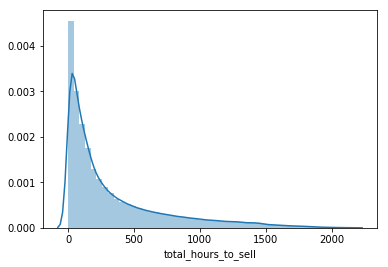

In [15]:
sns.distplot(df['total_hours_to_sell'])

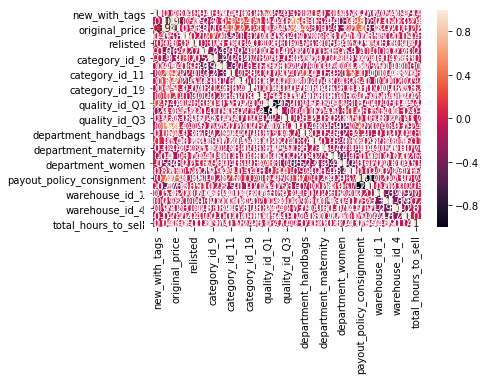

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['new_with_tags', 'original_msrp', 'original_price',
       'seasonal_slope_30d', 'relisted', 'category_id_8', 'category_id_9',
       'category_id_10', 'category_id_11', 'category_id_12', 'category_id_19',
       'category_id_26', 'quality_id_Q1', 'quality_id_Q2', 'quality_id_Q3',
       'departmenT_X', 'department_handbags', 'department_juniors',
       'department_maternity', 'departmenT_plus', 'department_women',
       'departmenT_women_shoes', 'payout_policy_consignment',
       'payout_policy_upfront', 'warehouse_id_1', 'warehouses_id_3',
       'warehouse_id_4', 'warehouse_id_5', 'total_hours_to_sell'],
      dtype='object')

In [18]:
X=df[['new_with_tags', 'original_msrp', 'original_price',
       'seasonal_slope_30d', 'relisted', 'category_id_8', 'category_id_9',
       'category_id_10', 'category_id_11', 'category_id_12', 'category_id_19',
       'category_id_26', 'quality_id_Q1', 'quality_id_Q2', 'quality_id_Q3',
       'departmenT_X', 'department_handbags', 'department_juniors',
       'department_maternity', 'departmenT_plus', 'department_women',
       'departmenT_women_shoes', 'payout_policy_consignment',
       'payout_policy_upfront', 'warehouse_id_1', 'warehouses_id_3',
       'warehouse_id_4', 'warehouse_id_5']]

In [19]:
y=df['total_hours_to_sell']

In [36]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()

In [37]:
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     total_hours_to_sell   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     444.0
Date:                 Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                         15:52:19   Log-Likelihood:            -2.3887e+06
No. Observations:               323306   AIC:                         4.777e+06
Df Residuals:                   323282   BIC:                         4.778e+06
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [20]:
#Another way to do OLS (which is commonly knows as Linear Regression)
from sklearn.model_selection import train_test_split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# print the intercept
print(lm.intercept_)

245.790766298


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
new_with_tags,2.071535
original_msrp,0.015193
original_price,-0.039518
seasonal_slope_30d,6819.541349
relisted,-37.158909
category_id_8,-40.321959
category_id_9,-12.084502
category_id_10,-27.757184
category_id_11,1.783764
category_id_12,14.191538


In [32]:
lm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [27]:
predictions = lm.predict(X_test)

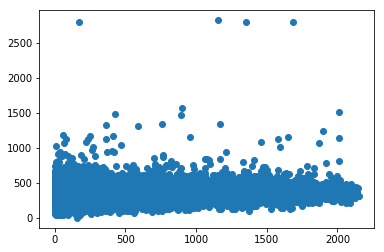

In [28]:
plt.scatter(y_test,predictions)

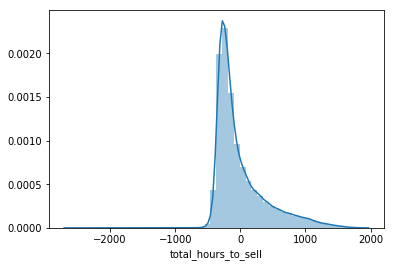

In [29]:
sns.distplot((y_test-predictions),bins=50)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))

MAE: 296.460698973
MSE: 152374.447313
RMSE: 390.351696951
R-squared: 0.0298670416624


In [40]:
#Based on p-values, I removed least significat x variables which were new_with_tags,category_id_9, category_id_26 and department_maternity
#Also, r-squared value is very bad (0.029) which shows that model was able to explain only 29% of the variation in the data
X=df[['original_msrp', 'original_price',
       'seasonal_slope_30d', 'relisted', 'category_id_8',
       'category_id_10', 'category_id_11', 'category_id_12', 'category_id_19',
       'quality_id_Q1', 'quality_id_Q2', 'quality_id_Q3',
       'departmenT_X', 'department_handbags', 'department_juniors','departmenT_plus', 'department_women',
       'departmenT_women_shoes', 'payout_policy_consignment',
       'payout_policy_upfront', 'warehouse_id_1', 'warehouses_id_3',
       'warehouse_id_4', 'warehouse_id_5']]

In [41]:
y=df['total_hours_to_sell']

In [42]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()

In [43]:
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     total_hours_to_sell   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     486.1
Date:                 Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                         16:01:45   Log-Likelihood:            -2.3887e+06
No. Observations:               323306   AIC:                         4.777e+06
Df Residuals:                   323284   BIC:                         4.778e+06
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [ ]:
#R-square is still .031 ( which means only 3% of variations are explained by the model) even after removing the insignificant variables.
#This may be due to the drpped variables (the variable I have dropped in Data CLeaning step)